# 数据探索

In [1]:
import pandas as pd

In [2]:
lc_df = pd.read_csv('loan.csv',low_memory=False)
lc_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
lc_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [4]:
lc_df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

In [5]:
bad_status = ['Charged Off','Default','Late (31-120 days)',
              'In Grace Period',
             'Late (16-30 days)',
              'Does not meet the credit policy. Status:Charged Off']
good_status = ['Fully Paid',
               'Does not meet the credit policy. Status:Fully Paid']
lc_df['y']=None
lc_df.loc[lc_df['loan_status'].isin(bad_status),'y']=1
lc_df.loc[lc_df['loan_status'].isin(good_status),'y']=0

In [6]:
lc_df[['loan_status','y']]

,loan_status,y
0,Fully Paid,0
1,Charged Off,1
2,Fully Paid,0
3,Fully Paid,0
4,Current,None
...,...,...
887374,Current,None
887375,Current,None
887376,Current,None
887377,Current,None


In [7]:
lc_df['issue_d']

0         Dec-2011
1         Dec-2011
2         Dec-2011
3         Dec-2011
4         Dec-2011
            ...   
887374    Jan-2015
887375    Jan-2015
887376    Jan-2015
887377    Jan-2015
887378    Jan-2015
Name: issue_d, Length: 887379, dtype: object

In [8]:
lc_df['issue_mon'],lc_df['issue_year']=lc_df['issue_d'].str.split('-').str

In [9]:
lc_df[['issue_d','issue_year','issue_mon']]

,issue_d,issue_year,issue_mon
0,Dec-2011,2011,Dec
1,Dec-2011,2011,Dec
2,Dec-2011,2011,Dec
3,Dec-2011,2011,Dec
4,Dec-2011,2011,Dec
...,...,...,...
887374,Jan-2015,2015,Jan
887375,Jan-2015,2015,Jan
887376,Jan-2015,2015,Jan
887377,Jan-2015,2015,Jan


In [10]:
years =['2011','2012','2013','2014','2015']
lc_df_by_year={}
for year in years:
    lc_df_by_year[year]=lc_df.loc[lc_df['issue_year']==year]

lc_df_by_year['2011']['issue_year'].tail()

21968    2011
22013    2011
22155    2011
22167    2011
22348    2011
Name: issue_year, dtype: object

In [11]:
lc_df_by_year['2013']['issue_year']

42535     2013
42536     2013
42537     2013
42538     2013
42539     2013
          ... 
180484    2013
180584    2013
180653    2013
180933    2013
181053    2013
Name: issue_year, Length: 134755, dtype: object

In [12]:
valid_df = lc_df.loc[lc_df['y'].notnull()]
valid_df.head(10)
# lc_df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,y,issue_mon,issue_year
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Dec,2011
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Dec,2011
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Dec,2011
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Dec,2011
5,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Dec,2011
7,1072053,1288686,3000.0,3000.0,3000.0,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Dec,2011
8,1071795,1306957,5600.0,5600.0,5600.0,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Dec,2011
9,1071570,1306721,5375.0,5375.0,5350.0,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Dec,2011
10,1070078,1305201,6500.0,6500.0,6500.0,60 months,14.65,153.45,C,C3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Dec,2011
11,1069908,1305008,12000.0,12000.0,12000.0,36 months,12.69,402.54,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Dec,2011


In [13]:
lc_df= lc_df.loc[lc_df['y'].notna()]
lc_df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,y,issue_mon,issue_year
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Dec,2011
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Dec,2011
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Dec,2011
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Dec,2011
5,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Dec,2011
7,1072053,1288686,3000.0,3000.0,3000.0,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Dec,2011
8,1071795,1306957,5600.0,5600.0,5600.0,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Dec,2011
9,1071570,1306721,5375.0,5375.0,5350.0,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Dec,2011
10,1070078,1305201,6500.0,6500.0,6500.0,60 months,14.65,153.45,C,C3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Dec,2011
11,1069908,1305008,12000.0,12000.0,12000.0,36 months,12.69,402.54,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Dec,2011


In [14]:
final_df = lc_df.dropna(axis=1).copy()
final_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,y,issue_mon,issue_year
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,861.07,0.00,0.00,0.00,171.62,1.0,INDIVIDUAL,0,Dec,2011
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,435.17,0.00,117.08,1.11,119.66,1.0,INDIVIDUAL,1,Dec,2011
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,603.65,0.00,0.00,0.00,649.91,1.0,INDIVIDUAL,0,Dec,2011
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,2209.33,16.97,0.00,0.00,357.48,1.0,INDIVIDUAL,0,Dec,2011
5,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,...,631.38,0.00,0.00,0.00,161.03,1.0,INDIVIDUAL,0,Dec,2011


In [15]:
final_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'purpose', 'zip_code', 'addr_state', 'dti',
       'revol_bal', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'policy_code', 'application_type', 'y', 'issue_mon',
       'issue_year'],
      dtype='object')

In [16]:
bad_df = final_df.loc[final_df['y']==1]
good_df = final_df.loc[final_df['y']==0]
bad_df.shape

(67429, 37)

In [17]:
good_df.shape

(209711, 37)

# 画图

In [18]:
import seaborn as sns
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [19]:
np.mean(good_df['loan_amnt'])

13303.757432848062

In [20]:
np.mean(bad_df['loan_amnt'])

14858.564934968634

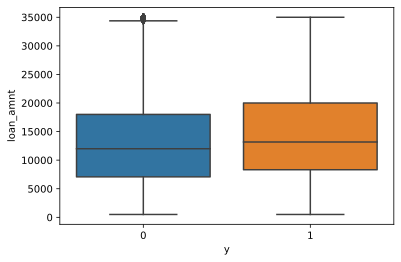

In [21]:
sns.boxplot(x='y',y='loan_amnt',data=final_df)#违约和贷款量

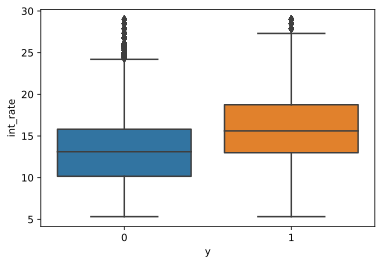

In [22]:
sns.boxplot(x='y',y='int_rate',data=final_df) #违约和贷款利率

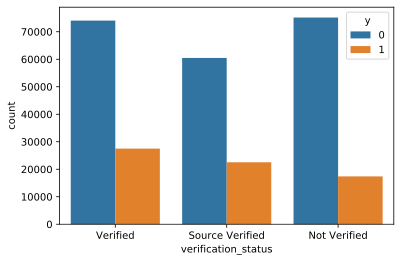

In [23]:
sns.countplot(x='verification_status',hue='y',data=final_df) #验证情况和违约情况

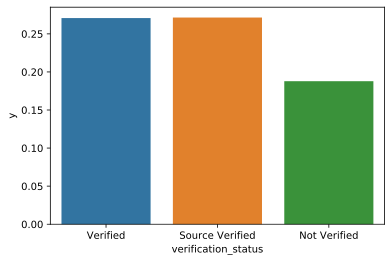

In [24]:
sns.barplot(x='verification_status',y='y',ci=None,data=final_df)

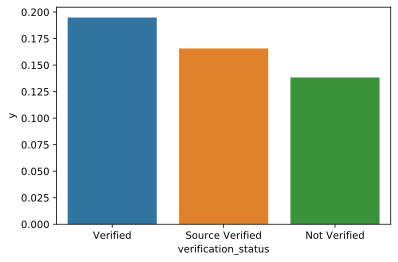

In [25]:
sns.barplot(x='verification_status',y='y',ci=None,data=final_df.loc[final_df['issue_year']=='2011'])

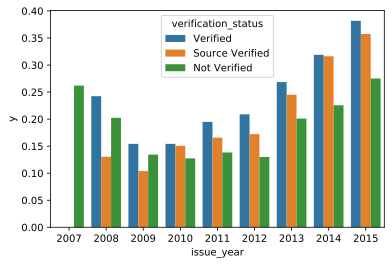

In [26]:
sns.barplot(x='issue_year',y='y',
            hue='verification_status',ci=None,data=final_df) #违约率和年份

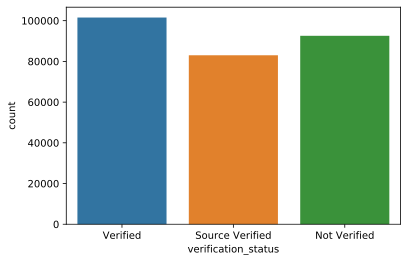

In [27]:
sns.countplot(x='verification_status',data=final_df)

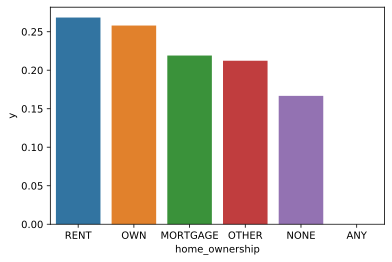

In [28]:
sns.barplot(x='home_ownership',y='y',ci=None,data=final_df)

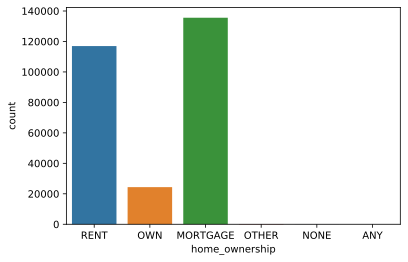

In [29]:
sns.countplot(x='home_ownership',data=final_df)

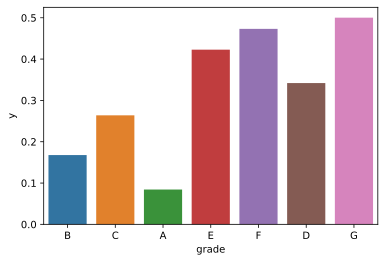

In [30]:
sns.barplot(x='grade',y='y',ci=None,data=final_df)

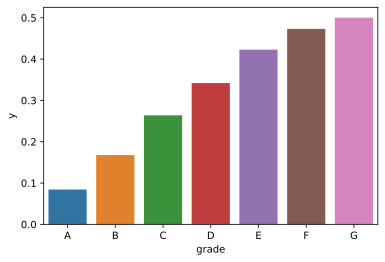

In [31]:
sns.barplot(x='grade',y='y',ci=None,data=final_df,order=['A','B','C','D','E','F','G'])

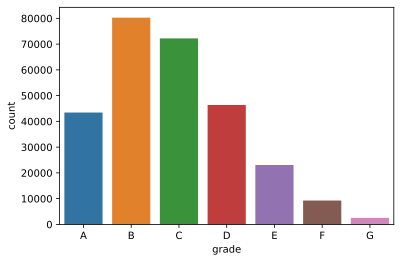

In [32]:
sns.countplot(x='grade',data=final_df,order=['A','B','C','D','E','F','G'])

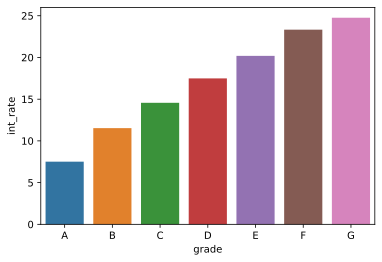

In [33]:
sns.barplot(x='grade',y='int_rate',ci=None,data=final_df,order=['A','B','C','D','E','F','G'])

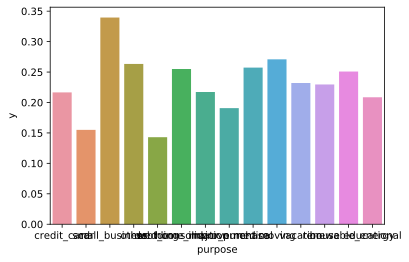

In [34]:
sns.barplot(x='purpose',y='y',ci=None,data=final_df)

In [35]:
import matplotlib.pyplot as plt

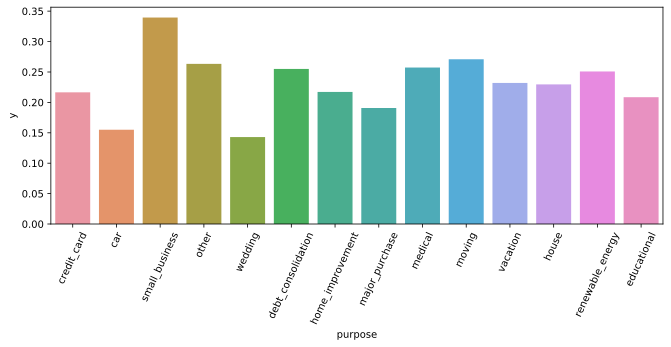

In [36]:
plt.subplots(figsize=(11,4))
plt.xticks(rotation=65)
sns.barplot(x='purpose',y='y',ci=None,data=final_df)

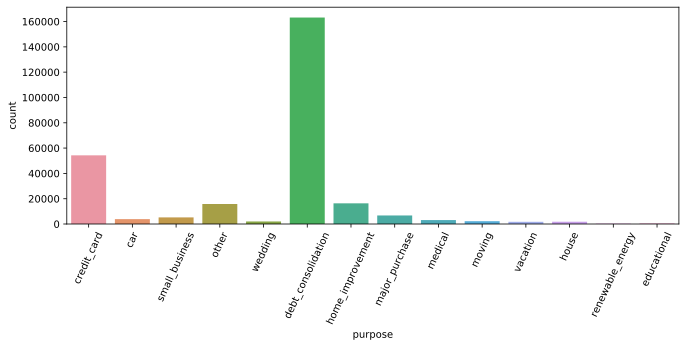

In [37]:
plt.subplots(figsize=(11,4))
plt.xticks(rotation=65)
sns.countplot(x='purpose',data=final_df)

# 预测验证

In [38]:
final_df.dtypes

id                           int64
member_id                    int64
loan_amnt                  float64
funded_amnt                float64
funded_amnt_inv            float64
term                        object
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
home_ownership              object
verification_status         object
issue_d                     object
loan_status                 object
pymnt_plan                  object
url                         object
purpose                     object
zip_code                    object
addr_state                  object
dti                        float64
revol_bal                  float64
initial_list_status         object
out_prncp                  float64
out_prncp_inv              float64
total_pymnt                float64
total_pymnt_inv            float64
total_rec_prncp            float64
total_rec_int              float64
total_rec_late_fee  

In [39]:
final_df['y']=final_df['y'].astype(int)
final_df['y'].dtypes

dtype('int32')

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [41]:
x_features = ['home_ownership','grade','verification_status']
training_years = ['2012','2013','2014']
test_years=['2015']

In [42]:
feature_df = final_df[x_features+['issue_year','y']]

In [43]:
feature_df.head()

,home_ownership,grade,verification_status,issue_year,y
0,RENT,B,Verified,2011,0
1,RENT,C,Source Verified,2011,1
2,RENT,C,Not Verified,2011,0
3,RENT,C,Source Verified,2011,0
5,RENT,A,Source Verified,2011,0


In [44]:
# columns:指定需要实现类别转换的列名，类似one-hot，但是有个全0
dummy_df = pd.get_dummies(feature_df,columns=x_features)

In [45]:
dummy_df.head()

,issue_year,y,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,2011,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
1,2011,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
2,2011,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
3,2011,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
5,2011,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0


In [46]:
training_samples = dummy_df.loc[dummy_df['issue_year'].isin(training_years)]

In [47]:
test_samples = dummy_df.loc[dummy_df['issue_year'].isin(test_years)]

In [48]:
training_samples.head()

,issue_year,y,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
42538,2013,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
42544,2013,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
42546,2013,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
42549,2013,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
42550,2013,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [49]:
test_samples.head()

,issue_year,y,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
467234,2015,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
467594,2015,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
467825,2015,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
468190,2015,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
468331,2015,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [70]:
classifier = RandomForestClassifier(n_estimators=10)
classifier_lg = LogisticRegression(solver='liblinear')
features = list(set(dummy_df.columns)-set(['y','issue_year']))
features

['home_ownership_NONE',
 'grade_G',
 'home_ownership_RENT',
 'verification_status_Not Verified',
 'grade_D',
 'grade_A',
 'grade_F',
 'grade_C',
 'verification_status_Verified',
 'home_ownership_MORTGAGE',
 'home_ownership_OTHER',
 'grade_B',
 'home_ownership_OWN',
 'home_ownership_ANY',
 'verification_status_Source Verified',
 'grade_E']

In [71]:
classifier.fit(training_samples[features],training_samples['y'])
y_predict = classifier.predict(test_samples[features])
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [72]:
classifier_lg.fit(training_samples[features],training_samples['y'])
y_predict_lg = classifier_lg.predict(test_samples[features])
y_predict_lg

array([0, 0, 0, ..., 0, 0, 0])

In [73]:
from sklearn.metrics import accuracy_score,roc_auc_score

In [74]:
accuracy_score(test_samples['y'],y_pred=y_predict)

0.6635215643795787

In [75]:
roc_auc_score(test_samples['y'],y_predict)

0.5299658483414076

In [76]:
accuracy_score(test_samples['y'],y_pred=y_predict_lg)

0.6608990621704056

In [77]:
roc_auc_score(test_samples['y'],y_predict_lg)

0.5177641628332021